# Loan predictions

## Goal

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

This is a very pivotal step in the process of analyzing data. This involves understanding the problem and making some hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analysis which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

Additional hypotheses:

- Applicants having coapplicants with income
- Applicants who are not self-employed
- Applicants with loan amounts such that the ratio of loan amount to total income does not exceed a certain threshold

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
import statsmodels.api as sm
plt.rcParams["figure.figsize"] = (16, 9)

df = pd.read_csv("classification_exercise.csv") 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df = pd.read_csv("classification_exercise.csv") 
df

One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [2]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


Look at some basic statistics for numerical variables.

In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`. (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with expectation? And `CoapplicantIncome`?
3. Tipp: Possible skew in the data can be seen by comparing the mean to the median, i.e. the 50% figure of a feature.



In [5]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

There are 475 applicants with a credit history and 89 applicants without credit history.

We can see that the data for both ApplicantIncome and CoapplicantIncome are probably skewed given that the means are significantly higher than the medians and the maximum for each variable is also drastically higher than their respective 75%-quantile value.

In [6]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Moving to nominal (categorical) variable. Look at the number of unique values in each of them.

In [7]:
uniq = len(set(df['Loan_ID']))
total = len(df['Loan_ID'])
total - uniq

0

In [8]:
set(df['Gender'])

{'Female', 'Male', nan}

In [9]:
set(df['Married'])

{'No', 'Yes', nan}

In [10]:
set(df['Dependents'])

{'0', '1', '2', '3+', nan}

In [11]:
set(df['Education'])

{'Graduate', 'Not Graduate'}

In [12]:
set(df['Self_Employed'])

{'No', 'Yes', nan}

In [13]:
set(df['Property_Area'])

{'Rural', 'Semiurban', 'Urban'}

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reason

In [14]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [18]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



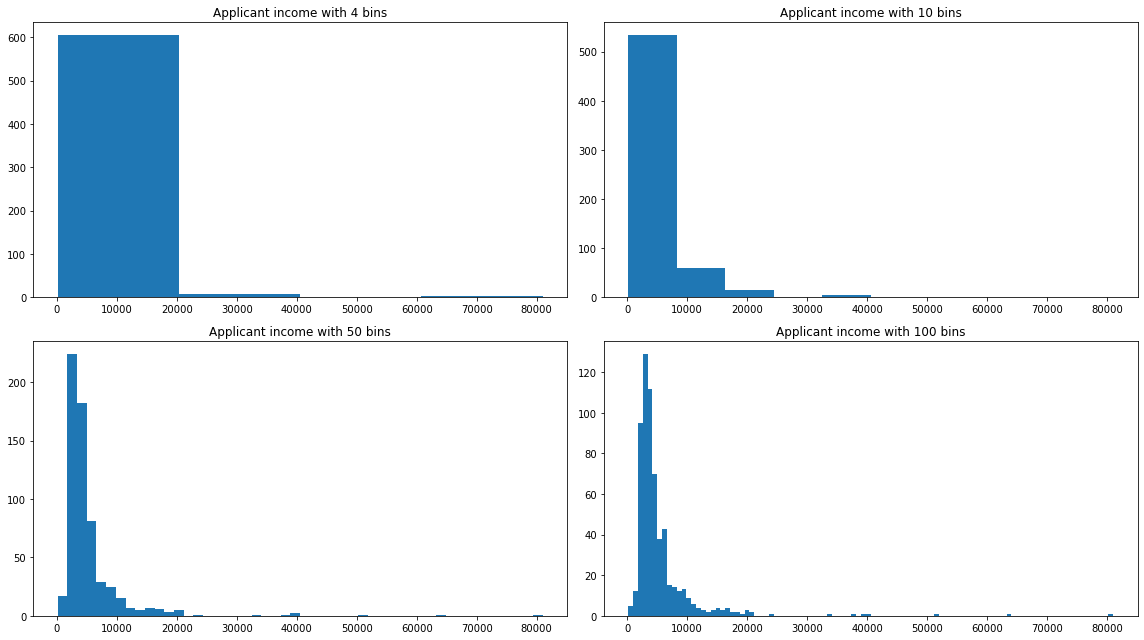

In [20]:
data = df['ApplicantIncome']

# 4 bins
plt.subplot(2, 2, 1)
plt.hist(data, bins = 4)
plt.title('Applicant income with 4 bins')

# 10 bins
plt.subplot(2, 2, 2)
plt.hist(data, bins = 10)
plt.title('Applicant income with 10 bins')

# 50 bins
plt.subplot(2, 2, 3)
plt.hist(data, bins = 50)
plt.title('Applicant income with 50 bins')

# 100 bins
plt.subplot(2, 2, 4)
plt.hist(data, bins = 100)
plt.title('Applicant income with 100 bins')

plt.tight_layout()
plt.show()


Look at box plots to understand the distributions. 

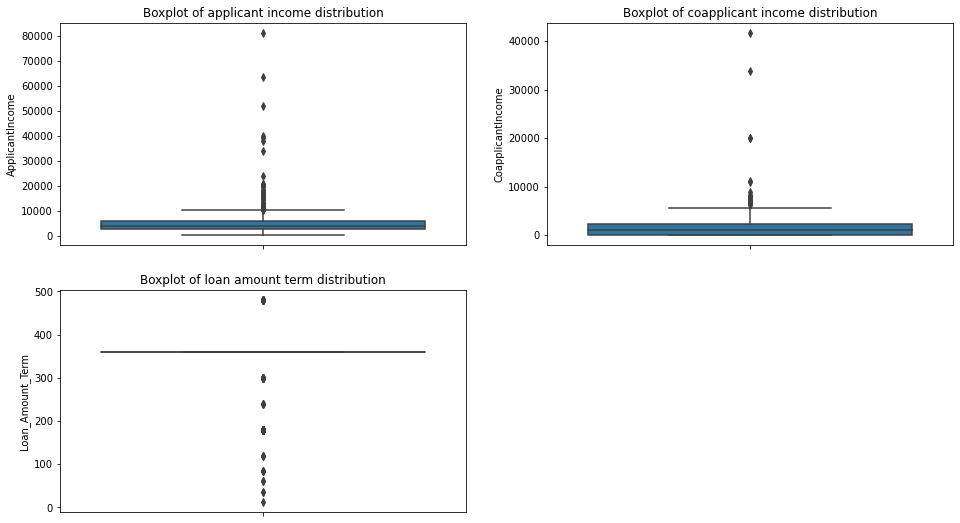

In [21]:
plt.subplot(2, 2, 1)
sns.boxplot(y = 'ApplicantIncome', data = df)
plt.title('Boxplot of applicant income distribution')

plt.subplot(2, 2, 2)
sns.boxplot(y = 'CoapplicantIncome', data = df)
plt.title('Boxplot of coapplicant income distribution')

plt.subplot(2, 2, 3)
sns.boxplot(y = 'Loan_Amount_Term', data = df)
plt.title('Boxplot of loan amount term distribution')

plt.show()

Look at the distribution of income segregated  by `Education`

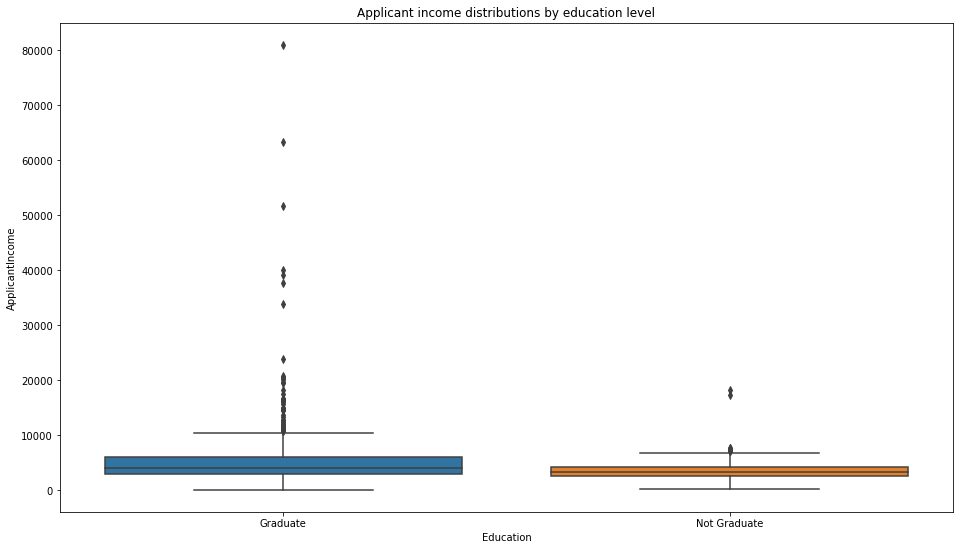

In [22]:
sns.boxplot(x = 'Education', y = 'ApplicantIncome', data = df)
plt.title('Applicant income distributions by education level')
plt.show()

Look at the histogram and boxplot of LoanAmount

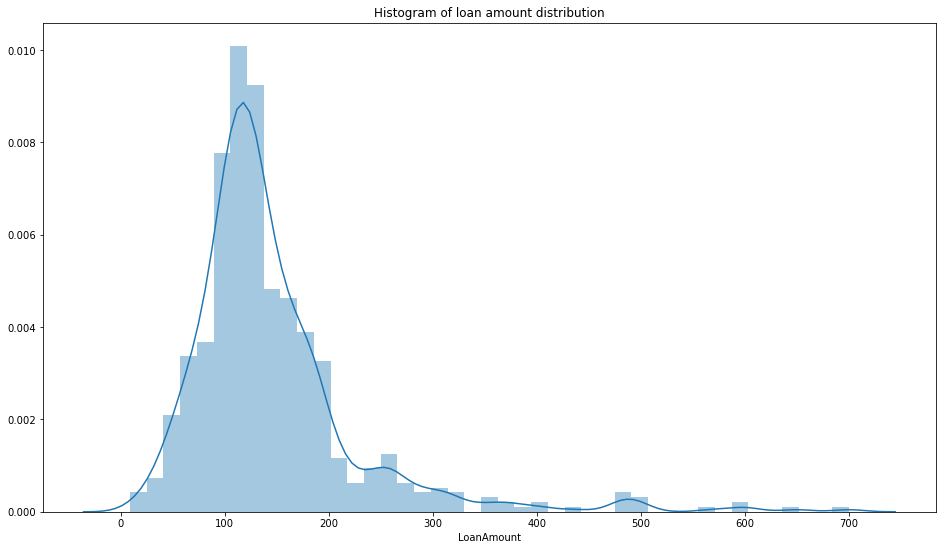

In [23]:
sns.distplot(df['LoanAmount'])
plt.title('Histogram of loan amount distribution')
plt.show()

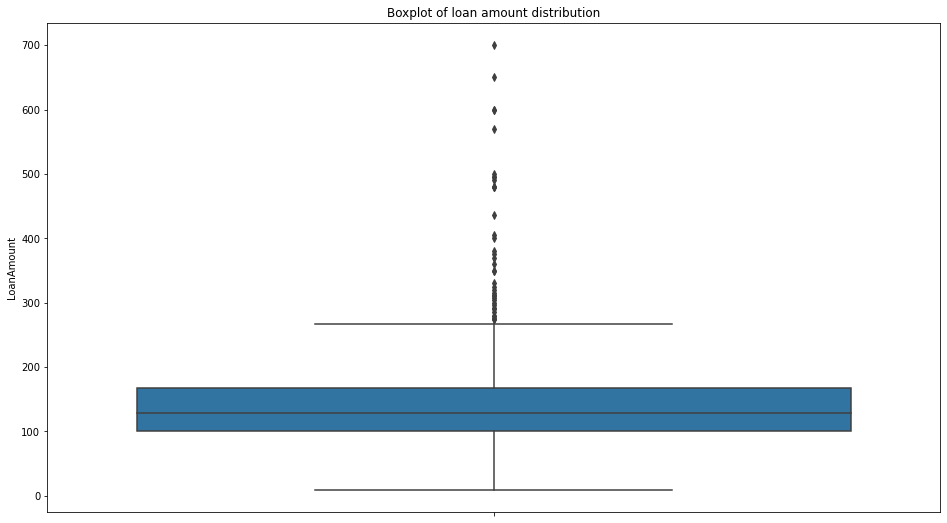

In [24]:
sns.boxplot(y = 'LoanAmount', data = df)
plt.title('Boxplot of loan amount distribution')
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pivot_table`. 

In [25]:
df.loc[df['Loan_Status'] == 'Y', 'Loan_Status'] = 1
df.loc[df['Loan_Status'] == 'N', 'Loan_Status'] = 0

df.loc[df['Loan_Status'] == 1, 'Yes'] = 1
df.loc[df['Loan_Status'] == 0, 'No'] = 1

In [26]:
table1 = pd.pivot_table(df,  index = ['Gender', 'Education', 'Married'], values = ['Yes', 'No'], aggfunc = np.sum)
table1['Proportion of approval'] = table1['Yes'] / (table1['Yes'] + table1['No'])
table1

No    Yes  Proportion of approval
Gender Education    Married                                     
Female Graduate     No       24.0   42.0                0.636364
                    Yes       7.0   18.0                0.720000
       Not Graduate No        5.0    9.0                0.642857
                    Yes       1.0    5.0                0.833333
Male   Graduate     No       37.0   62.0                0.626263
                    Yes      68.0  207.0                0.752727
       Not Graduate No       12.0   19.0                0.612903
                    Yes      33.0   49.0                0.597561

Observing the above pivot table, being a graduate increases the chances to be granted a loan for men, but the opposite can be observed for women. We also observe that, in general, being married increases the chances of approval, to the exception of graduate men.

In [27]:
table2 = pd.pivot_table(df,  index = 'Self_Employed', values = ['Yes', 'No'], aggfunc = np.sum)
table2['Proportion of approval'] = table2['Yes'] / (table2['Yes'] + table2['No'])
table2

,No,Yes,Proportion of approval
Self_Employed,,,
No,157.0,343.0,0.686000
Yes,26.0,56.0,0.682927


Observing the above pivot table, self-employed applicants are as likely as salaried employes to obtain approval for the loan

In [28]:
table3 = pd.pivot_table(df,  index = 'Property_Area', values = ['Yes', 'No'], aggfunc = np.sum)
table3['Proportion of approval'] = table3['Yes'] / (table3['Yes'] + table3['No'])
table3

,No,Yes,Proportion of approval
Property_Area,,,
Rural,69.0,110.0,0.614525
Semiurban,54.0,179.0,0.768240
Urban,69.0,133.0,0.658416


Observing the above pivot table, applicants residing in the suburbs have the highest chance of getting their loan applications granted.

In [29]:
table4 = pd.pivot_table(df,  index = 'Credit_History', values = ['Yes', 'No'], aggfunc = np.sum)
table4['Proportion of approval'] = table4['Yes'] / (table4['Yes'] + table4['No'])
table4

,No,Yes,Proportion of approval
Credit_History,,,
0.0,82.0,7.0,0.078652
1.0,97.0,378.0,0.795789


In [30]:
df = df.drop(['Yes', 'No'], axis = 1)

The chances of getting a loan are much higher if the applicant has a valid credit history. Plot similar graphs by `Married`, `Self-Employed`, `Property_Area`, etc.

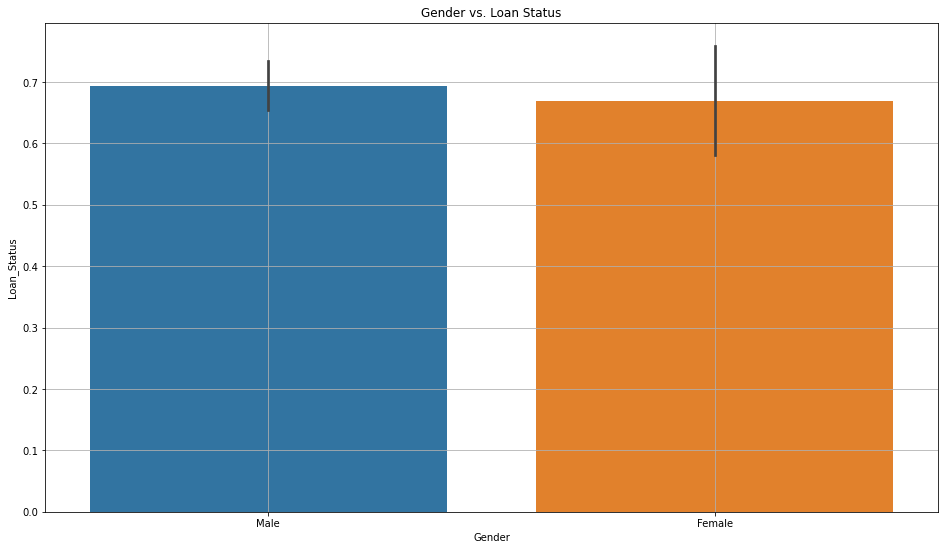

In [31]:
sns.barplot(x = 'Gender', y = 'Loan_Status', data = df)
plt.title('Gender vs. Loan Status')
plt.grid()
plt.show()

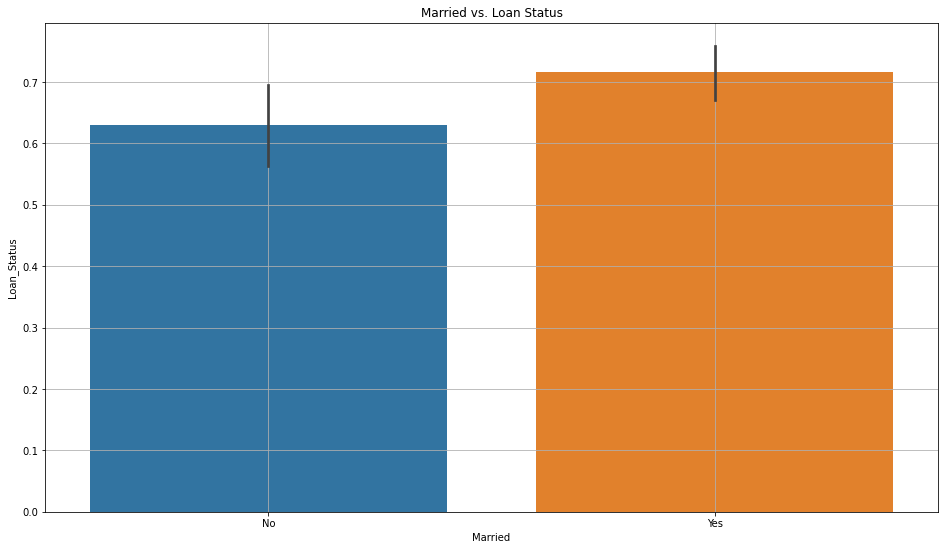

In [32]:
sns.barplot(x = 'Married', y = 'Loan_Status', data = df)
plt.title('Married vs. Loan Status')
plt.grid()
plt.show()

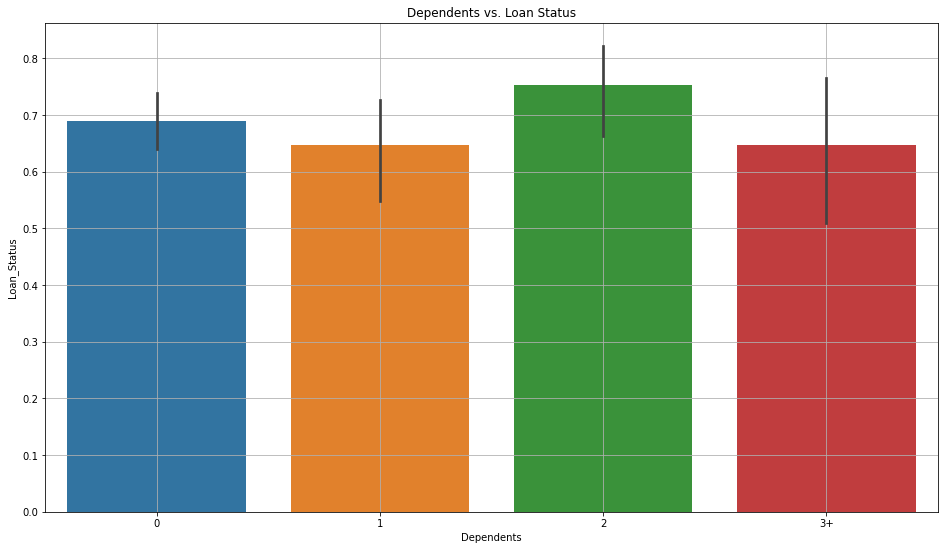

In [33]:
sns.barplot(x = 'Dependents', y = 'Loan_Status', data = df)
plt.title('Dependents vs. Loan Status')
plt.grid()
plt.show()

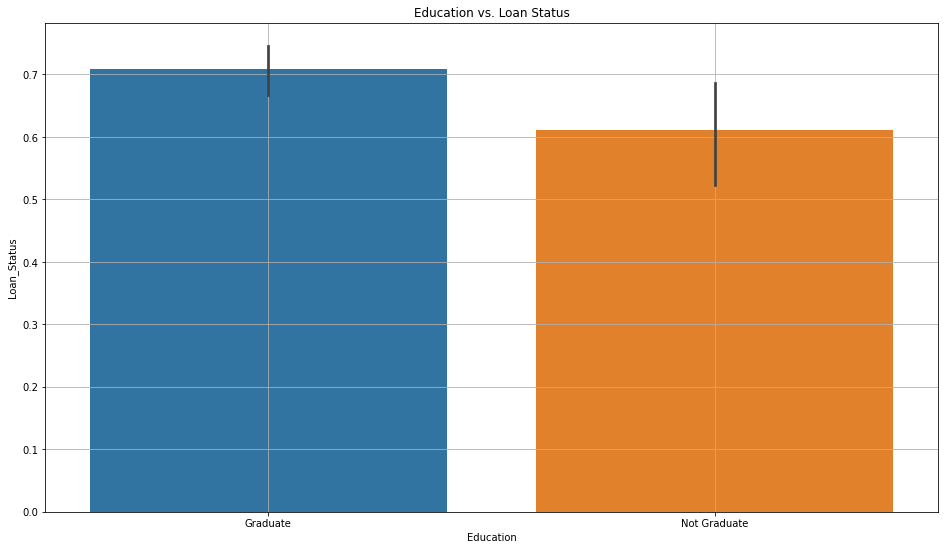

In [34]:
sns.barplot(x = 'Education', y = 'Loan_Status', data = df)
plt.title('Education vs. Loan Status')
plt.grid()
plt.show()

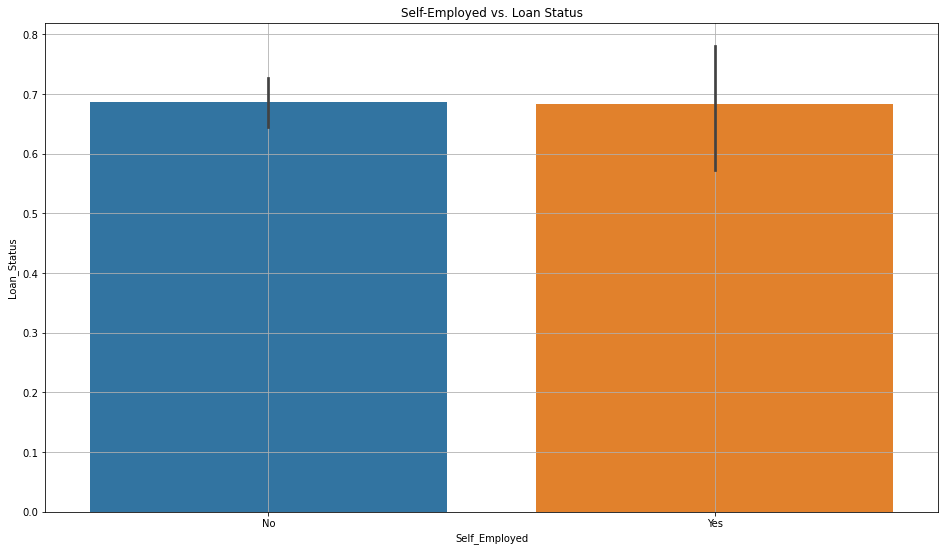

In [35]:
sns.barplot(x = 'Self_Employed', y = 'Loan_Status', data = df)
plt.title('Self-Employed vs. Loan Status')
plt.grid()
plt.show()

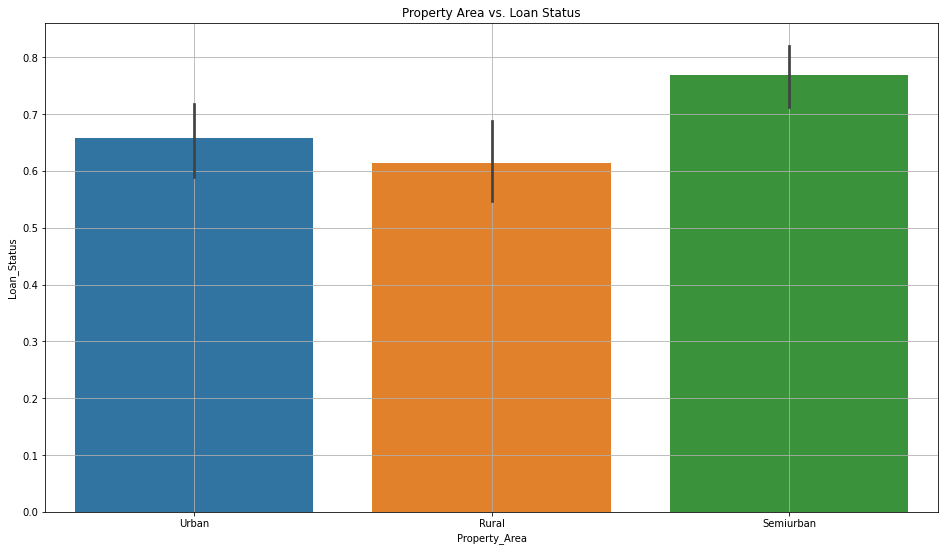

In [36]:
sns.barplot(x = 'Property_Area', y = 'Loan_Status', data = df)
plt.title('Property Area vs. Loan Status')
plt.grid()
plt.show()

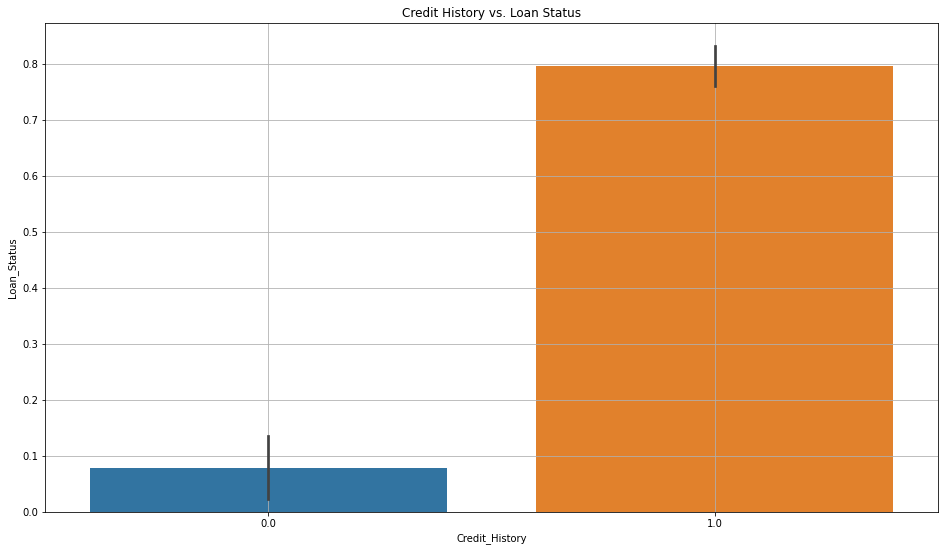

In [37]:
sns.barplot(x = 'Credit_History', y = 'Loan_Status', data = df)
plt.title('Credit History vs. Loan Status')
plt.grid()
plt.show()

## 3. Variable Transformation

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [38]:
# For Credit_History, we will assume 0 for the missing values since a financial institution will logically not forget to indicate the presence of credit history for a given applicant. 
# It is, afterall, a valuable information which the financial institution must buy to obtain it.
df['Credit_History'] = df['Credit_History'].fillna(0)

# For Self_Employed, we will assume 0 for the missing values since self-employed individuals are considered more at risk of default in payments than salaried employees are.
# As such, a financial institution will logically not neglect to indicate self-employed applicants.
df['Self_Employed'] = df['Self_Employed'].fillna(0)

# For Loan_Amount_Term we will take the mode as a value filler, which turns out to be 360
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)

# For Dependents, we will assume 0.
df['Dependents'] = df['Dependents'].fillna(0)

# For Gender, we shall simply put unknown since only 13 rows have missing data for gender so it would only create a small bias if it does happen.
df['Gender'] = df['Gender'].fillna('Unknown')

# For Married, we will assume No.
df['Married'] = df['Married'].fillna('No')

In [39]:
# For LoanAmount, we will compute the means segregated by Loan_Amount_Term.
LoanAmount_df = df[['LoanAmount', 'Loan_Amount_Term']].groupby('Loan_Amount_Term').mean()
print(LoanAmount_df)

                  LoanAmount
Loan_Amount_Term            
12.0              111.000000
36.0              117.500000
60.0              140.000000
84.0              132.250000
120.0              22.333333
180.0             147.523810
240.0             118.333333
300.0             185.153846
360.0             146.388560
480.0             151.800000


In [40]:
df.loc[df['Loan_Amount_Term'] == 180.0, 'LoanAmount'] = 147.523810
df.loc[df['Loan_Amount_Term'] == 240.0, 'LoanAmount'] = 118.333333
df.loc[df['Loan_Amount_Term'] == 360.0, 'LoanAmount'] = 147.245436

In [41]:
# We verify that no missing value remain

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


### Outliers
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after transformation

C:\Users\Phillipe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


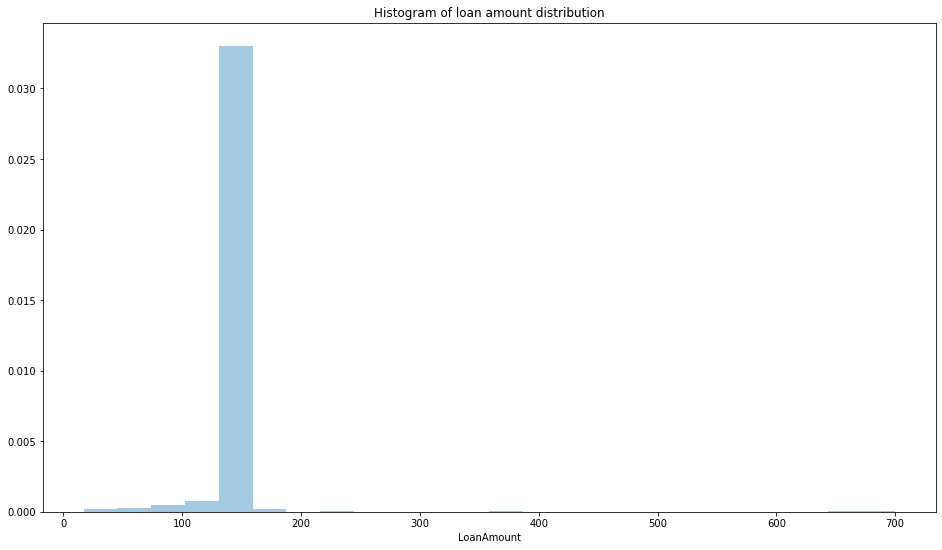

In [42]:
sns.distplot(df['LoanAmount'])
plt.title('Histogram of loan amount distribution')
plt.show()

C:\Users\Phillipe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


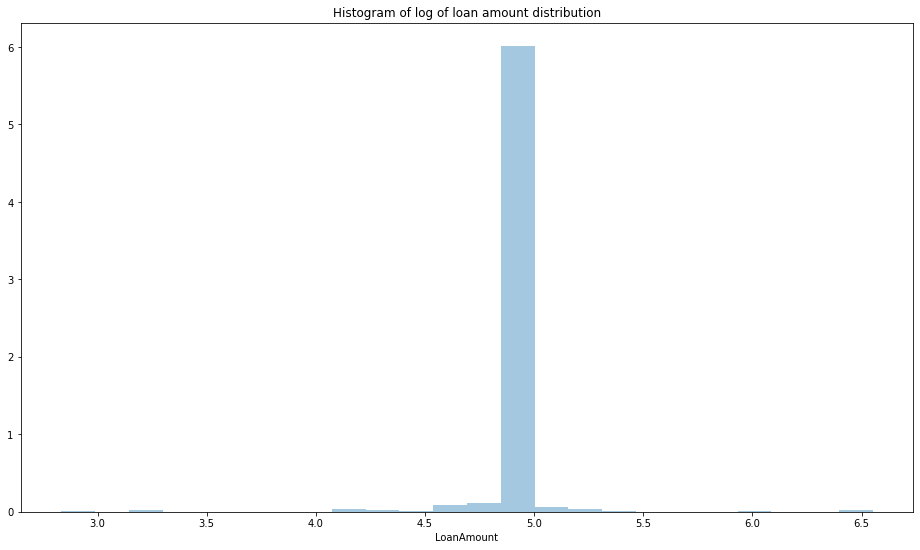

In [43]:
df['LoanAmount'] = df['LoanAmount'].apply(np.log)
sns.distplot(df['LoanAmount'])
plt.title('Histogram of log of loan amount distribution')
plt.show()

Combine both incomes as total income and take a log transformation of the same.

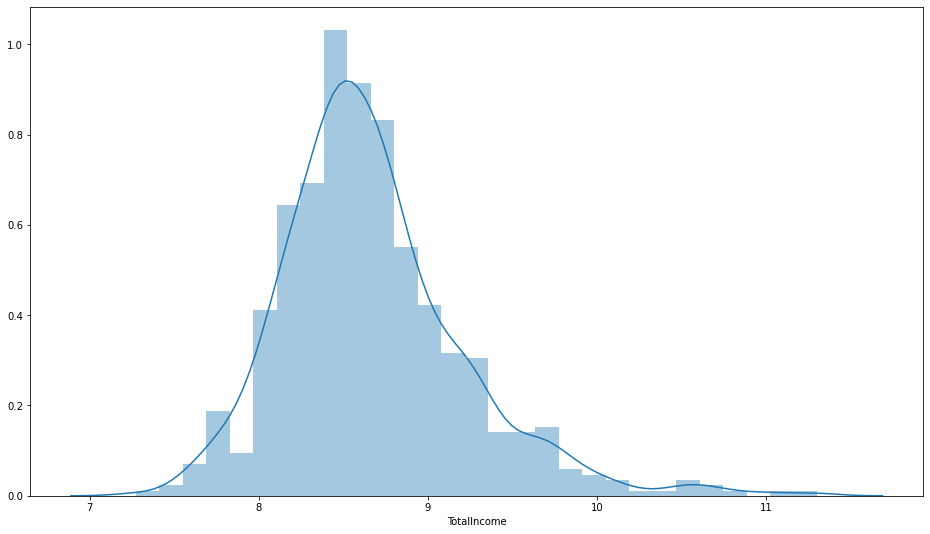

In [44]:
df.loc[:,'TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'] = df['TotalIncome'].apply(np.log)
sns.distplot(df['TotalIncome'])

plt.show()

### Categorical Variables
Create dummy variables from categorical ones. If the variable is ordinal, we can simply map it to numbers.

In [45]:
# Modifying ordinal variables.
df = df.replace({'Dependents' : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}, 
                 'Property_Area' : {'Rural' : 0, 'Semiurban' : 1, 'Urban' : 2}})

In [46]:
# Creating dummy variables for nominal variables.
df.loc[df['Gender'] == 'Male', 'Male'] = 1
df.loc[df['Gender'] != 'Male', 'Male'] = 0

df.loc[df['Gender'] == 'Female', 'Female'] = 1
df.loc[df['Gender'] != 'Female', 'Female'] = 0

df.loc[df['Education'] == 'Graduate', 'Graduate'] = 1
df.loc[df['Education'] == 'Not Graduate', 'Graduate'] = 1

df = df.replace({'Married' : {'Yes' : 1, 'No' : 0},
                 'Self_Employed' : {'Yes' : 1, 'No' : 1}})

In [57]:
model_df = df[['Credit_History', 'Male', 'Female', 'Married', 'Dependents', 'Graduate', 'Self_Employed', 'TotalIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area']]

y = df['Loan_Status']
model_df

,Credit_History,Male,Female,Married,Dependents,Graduate,Self_Employed,TotalIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,1.0,1.0,0.0,0,0,1.0,1,8.674026,4.992101,360.0,2
1,1.0,1.0,0.0,1,1,1.0,1,8.714568,4.992101,360.0,0
2,1.0,1.0,0.0,1,0,1.0,1,8.006368,4.992101,360.0,2
3,1.0,1.0,0.0,1,0,1.0,1,8.505323,4.992101,360.0,2
4,1.0,1.0,0.0,0,0,1.0,1,8.699515,4.992101,360.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1.0,0,0,1.0,1,7.972466,4.992101,360.0,0
610,1.0,1.0,0.0,1,3,1.0,1,8.320205,4.993990,180.0,0
611,1.0,1.0,0.0,1,1,1.0,1,9.025456,4.992101,360.0,2
612,1.0,1.0,0.0,1,2,1.0,1,8.933664,4.992101,360.0,2


In [58]:
# We check to make sure all features are numerical.
model_df.dtypes

Credit_History      float64
Male                float64
Female              float64
Married               int64
Dependents            int64
Graduate            float64
Self_Employed         int64
TotalIncome         float64
LoanAmount          float64
Loan_Amount_Term    float64
Property_Area         int64
dtype: object

In [59]:
# Same with the target variable
y.dtypes

dtype('O')

In [60]:
# Given the data type of y is an object, we convert it to integer
y = y.astype(int)
y.dtypes

dtype('int32')

## Building a Predictive Model

Make the first `LogisticRegression` model with `Credit_History` as the only feature.

In [101]:
X = sm.add_constant(model_df['Credit_History']) # adding a constant feature

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # splitting into train and test sets

In [103]:
# fitting a logistic function
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [104]:
metrics.accuracy_score(y_test, y_pred) # calculating accuracy score

0.8130081300813008

Not surprisingly, a model using only Credit_History has a high level of accuracy.

Try different combination of variables

In [105]:
# Let's start with the model including all features
X1 = sm.add_constant(model_df)

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2)

log_reg = LogisticRegression()
log_reg.fit(X1_train, y_train)
y_pred1 = log_reg.predict(X1_test)

metrics.accuracy_score(y_test, y_pred1)

C:\Users\Phillipe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7317073170731707

In [106]:
# Next we shall use Credit_History and Property_Area
X2 = sm.add_constant(model_df[['Credit_History', 'Property_Area']])

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2)

log_reg = LogisticRegression()
log_reg.fit(X2_train, y_train)
y_pred2 = log_reg.predict(X2_test)

metrics.accuracy_score(y_test, y_pred2)

0.7642276422764228

In [107]:
# Next we shall use Credit_History and Graduate
X3 = sm.add_constant(model_df[['Credit_History', 'Property_Area']])

X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.2)

log_reg = LogisticRegression()
log_reg.fit(X3_train, y_train)
y_pred3 = log_reg.predict(X3_test)

metrics.accuracy_score(y_test, y_pred3)

0.7560975609756098

In [118]:
# Next we shall use Credit_History and Married
X4 = sm.add_constant(model_df[['Credit_History', 'Married']])

X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size = 0.2)

log_reg = LogisticRegression()
log_reg.fit(X4_train, y_train)
y_pred4 = log_reg.predict(X4_test)

metrics.accuracy_score(y_test, y_pred4)

0.7804878048780488

In [119]:
# Next we shall use Credit_History, Married and Property_Area
X5 = sm.add_constant(model_df[['Credit_History', 'Married', 'Property_Area']])

X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size = 0.2)

log_reg = LogisticRegression()
log_reg.fit(X5_train, y_train)
y_pred5 = log_reg.predict(X5_test)

metrics.accuracy_score(y_test, y_pred5)

0.7642276422764228

In [120]:
# Next we shall use Credit_History, Married and Graduate
X6 = sm.add_constant(model_df[['Credit_History', 'Married', 'Graduate']])

X6_train, X6_test, y_train, y_test = train_test_split(X6, y, test_size = 0.2)

log_reg = LogisticRegression()
log_reg.fit(X6_train, y_train)
y_pred6 = log_reg.predict(X6_test)

metrics.accuracy_score(y_test, y_pred6)

0.7073170731707317

The accuracy might went up on adding variables, what about other metrics?

We shall calculate precision, recall and F1 score for the 7 diferent models we made.

In [125]:
# Model 1: Credit_History
print('precision = ' + str(metrics.precision_score(y_test, y_pred)))
print('recall = ' + str(metrics.recall_score(y_test, y_pred)))
print('F1-score = ' + str(metrics.f1_score(y_test, y_pred)))

precision = 0.6285714285714286
recall = 0.8571428571428571
F1-score = 0.7252747252747251


In [126]:
# Model 2: All features
print('precision = ' + str(metrics.precision_score(y_test, y_pred1)))
print('recall = ' + str(metrics.recall_score(y_test, y_pred1)))
print('F1-score = ' + str(metrics.f1_score(y_test, y_pred1)))

precision = 0.6304347826086957
recall = 0.7532467532467533
F1-score = 0.6863905325443787


In [128]:
# Model 3: Credit_History + Property_Area
print('precision = ' + str(metrics.precision_score(y_test, y_pred2)))
print('recall = ' + str(metrics.recall_score(y_test, y_pred2)))
print('F1-score = ' + str(metrics.f1_score(y_test, y_pred2)))

precision = 0.6666666666666666
recall = 0.8051948051948052
F1-score = 0.7294117647058824


In [130]:
# Model 4: Credit_History + Graduate
print('precision = ' + str(metrics.precision_score(y_test, y_pred3)))
print('recall = ' + str(metrics.recall_score(y_test, y_pred3)))
print('F1-score = ' + str(metrics.f1_score(y_test, y_pred3)))

precision = 0.6263736263736264
recall = 0.7402597402597403
F1-score = 0.6785714285714286


In [131]:
# Model 5: Credit_History + Married
print('precision = ' + str(metrics.precision_score(y_test, y_pred4)))
print('recall = ' + str(metrics.recall_score(y_test, y_pred4)))
print('F1-score = ' + str(metrics.f1_score(y_test, y_pred4)))

precision = 0.6170212765957447
recall = 0.7532467532467533
F1-score = 0.6783625730994152


In [132]:
# Model 6: Credit_History + Married + Property_Area
print('precision = ' + str(metrics.precision_score(y_test, y_pred5)))
print('recall = ' + str(metrics.recall_score(y_test, y_pred5)))
print('F1-score = ' + str(metrics.f1_score(y_test, y_pred5)))

precision = 0.6428571428571429
recall = 0.8181818181818182
F1-score = 0.7200000000000001


In [133]:
# Model 7: Credit_History + Married + Graduate
print('precision = ' + str(metrics.precision_score(y_test, y_pred6)))
print('recall = ' + str(metrics.recall_score(y_test, y_pred6)))
print('F1-score = ' + str(metrics.f1_score(y_test, y_pred6)))

precision = 0.7252747252747253
recall = 0.8571428571428571
F1-score = 0.7857142857142857


Taking a look at other metrics, it is interesting to note that recall tends to be high but precision is not that high, to the notable exception of the seventh model.

Try `RandomForestClassifier` with default parameters

In [137]:
from sklearn.ensemble import RandomForestClassifier
X = model_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # splitting into train and test sets

In [138]:
clf = RandomForestClassifier() # Using default parameters
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [139]:
metrics.accuracy_score(y_pred, y_test)

1.0

Try `grid search` to improve the results

In [140]:
from sklearn.model_selection import GridSearchCV

In [146]:
parameter_candidates = [
  {'n_estimators' : [10, 100, 1000],
   'criterion' : ['gini', 'entropy'],
   'max_depth' : [1, 2, 3, 4, 5, None],
   'min_samples_split' : [2, 3, 4, 5, 6],
   'min_samples_leaf' : [1, 2, 3, 4, 5]}
]

In [148]:
clf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameter_candidates, n_jobs = -1)
clf.fit(X_train, y_train)